KaggleのHome Credit Default Riskコンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

## 【問題1】コンペティション内容の把握


以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。


- このコンペティションでは何を予測する？目的変数は？


    - 目的変数は，顧客が返済能力を持っているか．


- 企業がこのコンペティションを開催することで得られるメリットは？


    - 今までお金を借りることが出来なかった人々が，借りるチャンスを得ることが出来る．これには，大企業等に限らず，個人なども含まれる．顧客が増え，売上が上がる．貸倒れ率が下がる．企業の宣伝になる．


- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？


    - これまでの返済履歴，収入，犯罪歴，職業・職歴，家族構成，保証人の信用性，資産，借りる金額の大きさ，住んでいるエリア，賃貸かどうか．

## 【問題2】データの概観


データの概観を把握してください。


コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
%matplotlib inline

In [2]:
# grasp an overview of the data

application_train = pd.read_csv('"Home Credit Default Risk"_application_train.csv')

application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


- .head()、.info()、describe()などを使う

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


    - 先頭の5行を出力した．

In [4]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


    - 特徴量は，121個ある．
    
    - float64型が65個，int64型が41個，object型が16個ある．
    
    - メモリ使用量は，286.2+ MB．

In [5]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


    - 平均値，標準偏差，四分位数などを同時に出力した．

- 欠損値の有無を見る

In [6]:
n_missing_values = application_train.isnull().sum().drop("SK_ID_CURR").drop("TARGET")

n_missing_values_table = pd.DataFrame({
    'missing_values': n_missing_values
})

n_missing_values_table

,missing_values
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
NAME_TYPE_SUITE,1292


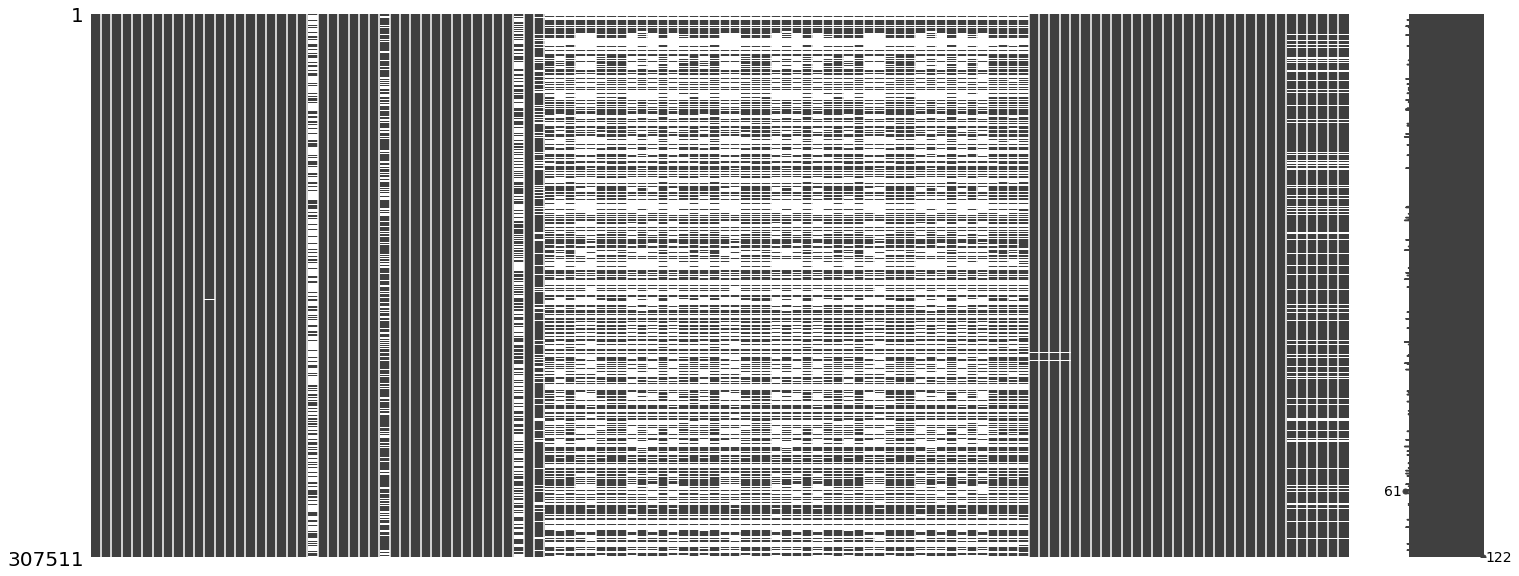

In [7]:
msno.matrix(application_train)

plt.show()

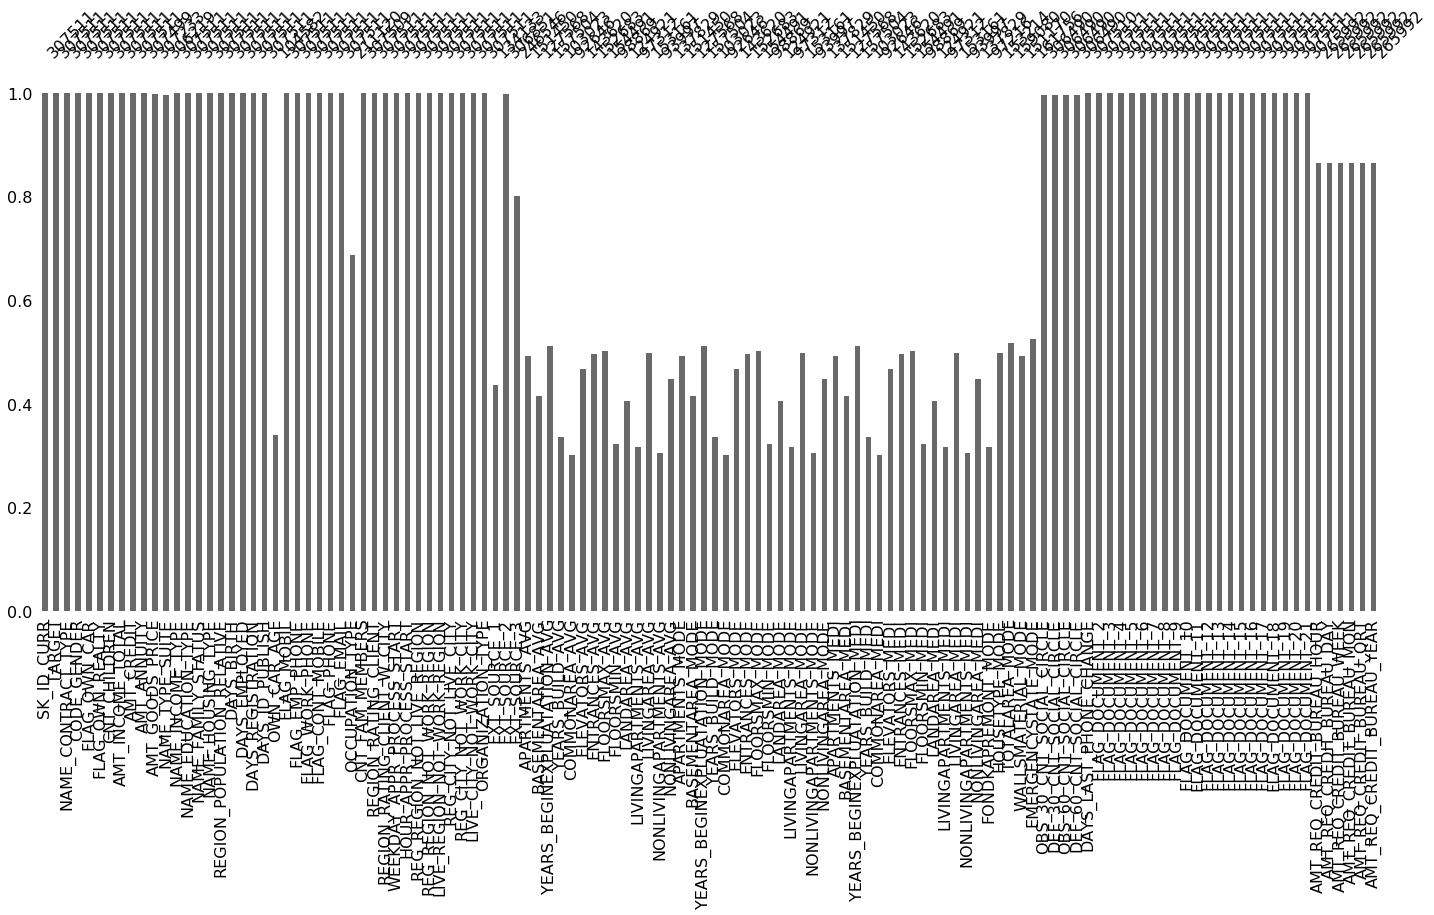

In [8]:
msno.bar(application_train)

plt.show()

- クラスごとのデータ数をグラフに出す

In [9]:
application_train.loc[:,"TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

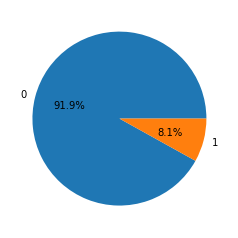

In [10]:
plt.pie(np.array(application_train.loc[:,"TARGET"].value_counts()), labels=[0,1], 
        autopct="%1.1f%%")

plt.show()

    - 282686人(91.9%)が返済し，24825人(8.1%)が返済しなかった．

## 【問題3】課題設定


データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

- 結局，どの特徴量の影響が大きい/小さいのか．


- 欠損値の有無をどこまで許容するのか．


- 欠損値をどう埋めるのか．


- 相関の強弱の判断（強すぎず，弱すぎない相関関係をどう探すのか）．


- heatmapでは表示できるが，同じデータを使っているのに，clustermapの方では出力できない．

## 【問題4】データ探索


問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。


課題合格の条件として、表やグラフを 合計15個以上出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

    - 仮説: 相関係数が比較的高い特徴量は重要であるので、そこを中心に探索していく。

In [11]:
# compute correlation coefficients

corr_mat = application_train.corr()

corr_mat

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988


    - 相関係数を算出したが，元の特徴量より16個減った．object型の要素を含む列を表示できていない．

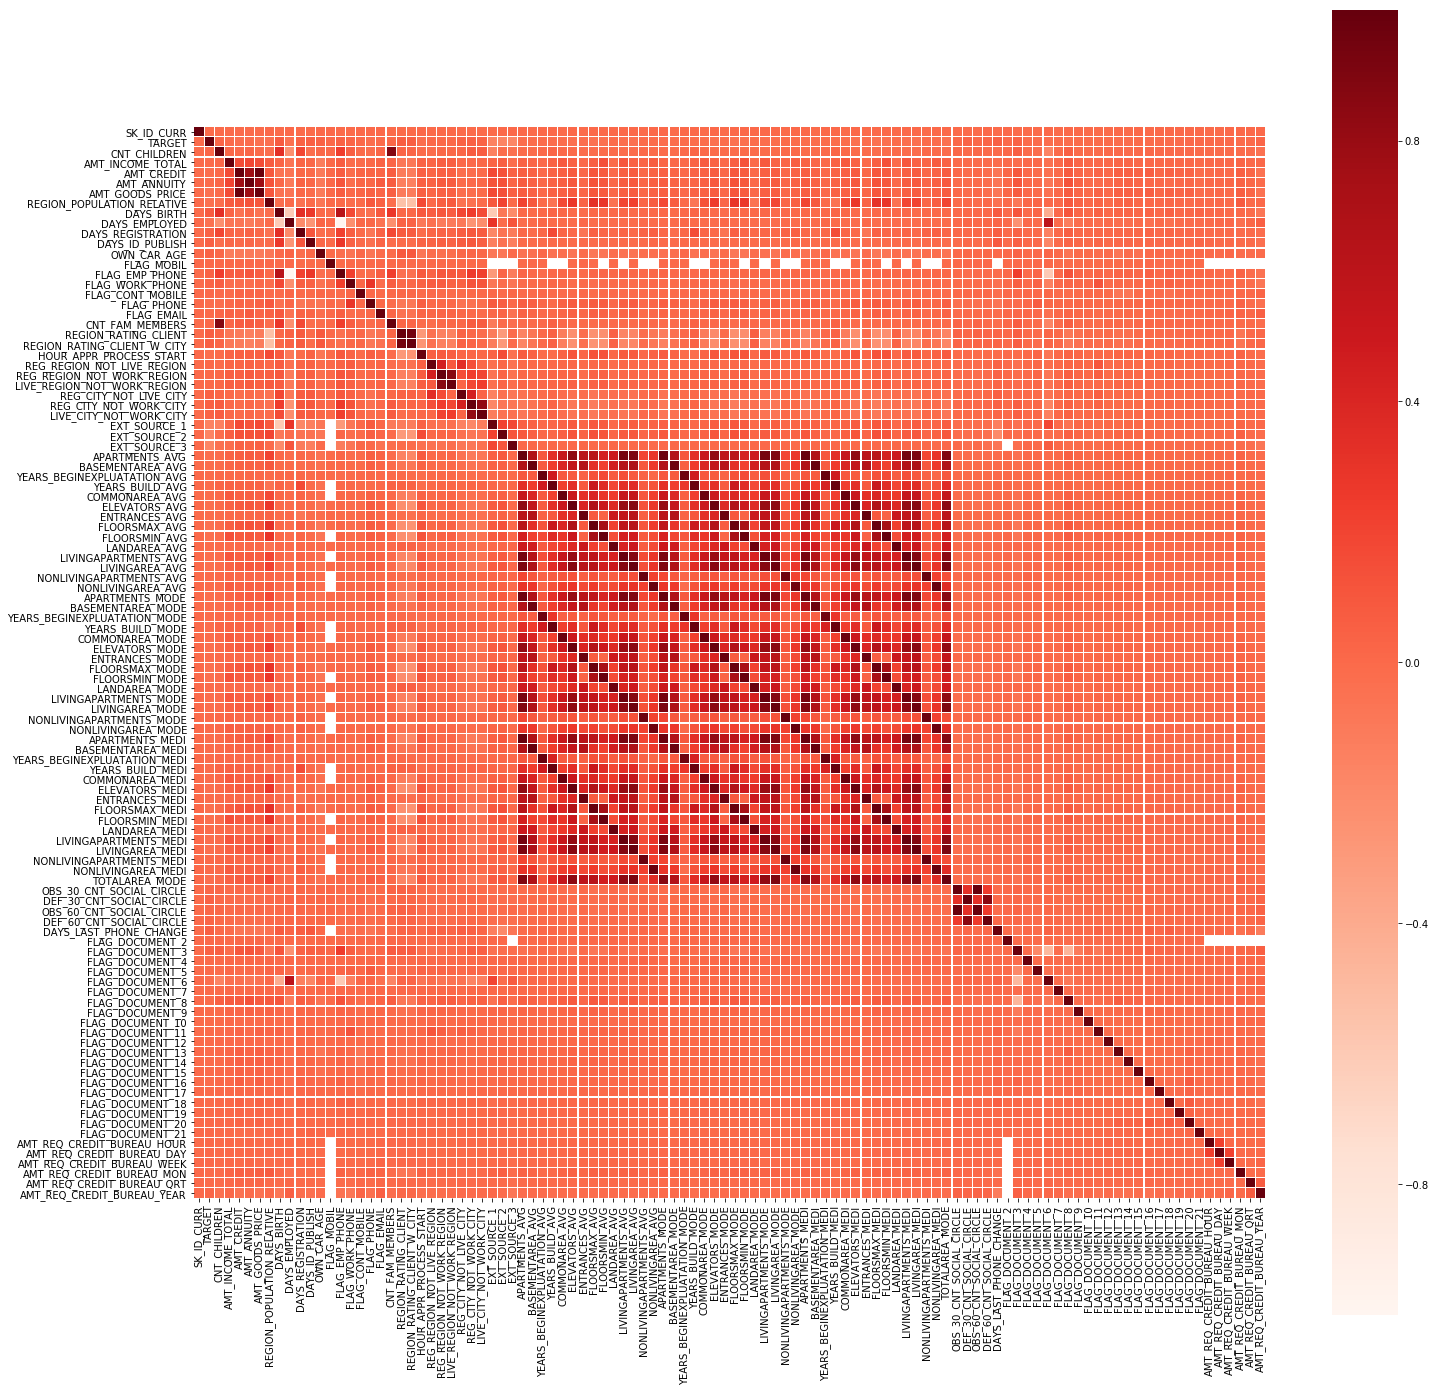

In [12]:
# create a heatmap without columns whose dtypes are object

plt.figure(figsize=(24,24))
sns.heatmap(corr_mat, linewidth=0.1, square=True, cmap="Reds")

plt.show()

    - object型の要素を持つ列を除いた分の，ヒートマップを作成した．
    
    - "AVG"や"MODE"や"MEDI"など、人間が計算して作り出した特徴量同士には、強い相関関係が出てしまう。

    - ひとまず、object型の値を持つ特徴量にダミー変数を与える。

In [13]:
# displays only columns whose dtypes are object

application_train.select_dtypes(include=object)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


    - object型の要素を持つ列だけを表示した．

In [14]:
# create dummies

new_application_train = pd.get_dummies(application_train)

new_application_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,0,0,0,0,0,0


    - object型の要素を持つ列において，ダミー変数を作成した．

In [15]:
# check the info of "dummies"

new_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 246 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int64(41), uint8(140)
memory usage: 289.7 MB


    - 元の列は削除されている．

In [16]:
#  compute correlation coefficients of the new data containing dummies

new_corr_mat = new_application_train.corr()

new_corr_mat

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000553,0.002073,-0.000976,0.000072,-0.001396,0.002300,-1.280782e-03,-0.000270,0.000510,0.002549
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,0.000982,-0.006777,-0.001713,-0.009384,0.000628,-0.033119,-1.265666e-02,0.007946,-0.042201,0.004829
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,-0.001830,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-2.508821e-02,0.011036,-0.038644,0.004525
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.000718,0.011696,0.006149,0.023886,0.003886,0.032753,1.652333e-02,-0.003369,0.050174,-0.002894
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.000869,0.014314,0.007987,0.027255,0.005799,0.046644,9.756049e-03,-0.007373,0.058256,-0.004308
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,0.002166,0.015589,0.010077,0.035318,0.005968,0.054988,9.188742e-03,-0.007711,0.068145,-0.003910
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.000796,0.013696,0.009955,0.028315,0.005877,0.049759,1.288831e-02,-0.009135,0.062878,-0.004848
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.011212,0.078062,0.016288,0.045775,0.013435,0.092652,1.078225e-02,-0.056263,0.103513,-0.029932
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.000388,-0.006749,-0.000262,0.004421,-0.000690,-0.013597,-1.096440e-02,0.008758,-0.019852,0.005434
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.001761,0.003691,-0.003692,-0.006892,-0.003120,-0.004193,-6.326739e-03,-0.002846,-0.010907,-0.003571


    - object型の要素を持つ列を，ダミー変数に変更した分の相関係数を算出した．

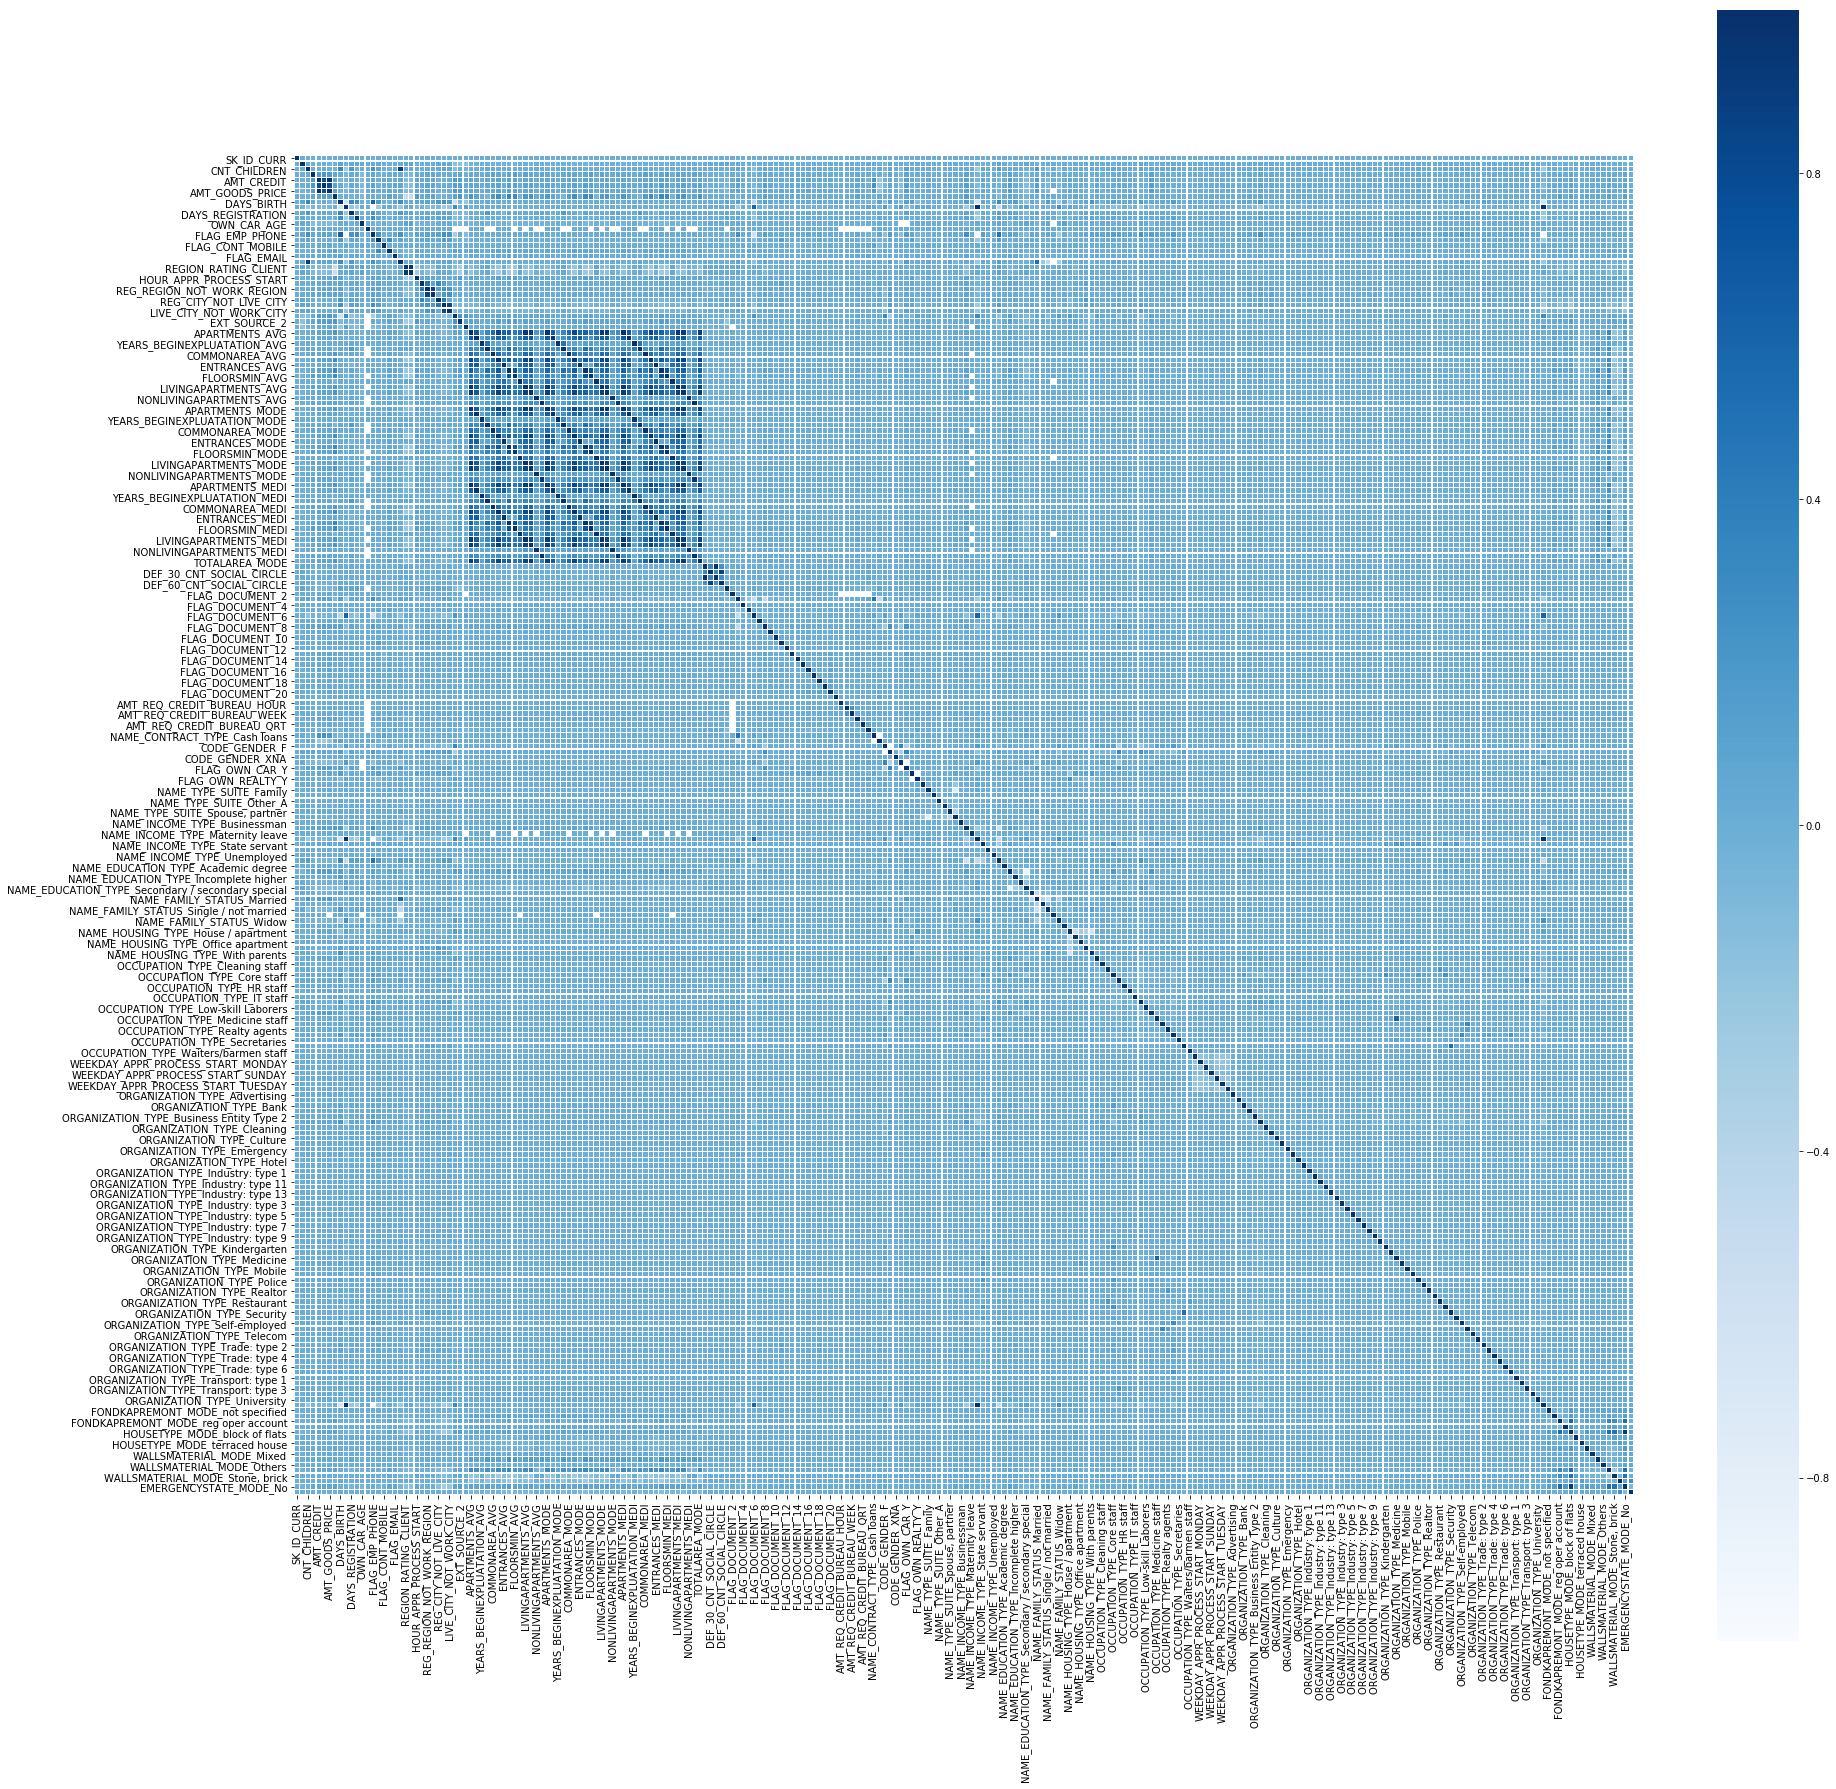

In [17]:
# create the entire heatmap of "new_corr_mat"

plt.figure(figsize=(30,30))
sns.heatmap(new_corr_mat, linewidth=0.1, square=True, cmap="Blues")

plt.show()

    - object型の要素を持つ列も含め，全ての特徴量の相関関係をグラフに出来た．
    
    - やはり、人間が値を算出して作った特徴量同士は強い相関関係を持っている。
    
    - 強い相関関係を持つ特徴量は多くはない。

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


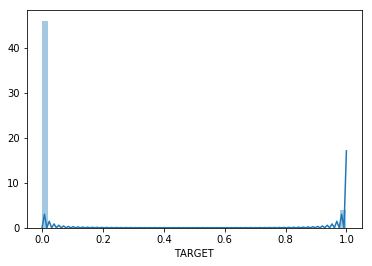

In [18]:
# check the distribution

sns.distplot(new_application_train.TARGET)

plt.show()

    - 目的変数の分布を表示したが，そもそも値が0と1しか無かった．
    
    - 不均衡データである。

    - 仮説: 目的変数と強い相関関係を持つ特徴量は重要である。

In [19]:
# get 50 feature values having the most strongest correlation with "TARGET"

top50_correlations = new_corr_mat.nlargest(51, "TARGET")["TARGET"].drop("TARGET")

top50_correlations_table = pd.DataFrame({
    'correlation': top50_correlations
})

top50_correlations_table

,correlation
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
NAME_INCOME_TYPE_Working,0.057481
DAYS_LAST_PHONE_CHANGE,0.055218
CODE_GENDER_M,0.054713
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special,0.049824
FLAG_EMP_PHONE,0.045982


    - 目的変数と相関関係が高い特徴量を，上から50個取り出した．

In [20]:
#  compute correlation coefficients of the 50 feature values

top50_corr_mat = new_corr_mat[top50_correlations.index].corr()

top50_corr_mat

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE_Working,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_M,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_EMP_PHONE,...,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,ORGANIZATION_TYPE_Trade: type 3,NAME_INCOME_TYPE_Unemployed,NAME_TYPE_SUITE_Unaccompanied,ORGANIZATION_TYPE_Trade: type 7,WALLSMATERIAL_MODE_Wooden,ORGANIZATION_TYPE_Agriculture,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Security
DAYS_BIRTH,1.000000,0.029410,0.026642,0.665386,0.138897,0.401360,0.655543,0.554015,-0.237105,0.900140,...,-0.011765,-0.012434,0.157482,-0.026620,0.061734,0.161601,0.028985,0.086163,0.099395,0.081505
REGION_RATING_CLIENT_W_CITY,0.029410,1.000000,0.997509,0.237548,0.134158,-0.060091,0.018879,0.181056,0.303460,-0.046539,...,0.130099,0.129037,-0.039078,0.006843,-0.062841,0.054458,0.269654,0.093436,0.040678,0.004885
REGION_RATING_CLIENT,0.026642,0.997509,1.000000,0.237278,0.132296,-0.061712,0.015787,0.152582,0.294081,-0.048714,...,0.130050,0.129028,-0.043951,0.007029,-0.057094,0.052850,0.256102,0.087160,0.037306,0.001187
NAME_INCOME_TYPE_Working,0.665386,0.237548,0.237278,1.000000,0.052486,0.303388,0.468106,0.470309,0.100257,0.725271,...,0.042536,0.041795,0.063902,-0.027740,0.012697,0.139826,0.103671,0.154008,0.080848,0.111614
DAYS_LAST_PHONE_CHANGE,0.138897,0.134158,0.132296,0.052486,1.000000,0.056308,0.183616,0.139269,0.045350,-0.009795,...,-0.021904,-0.022467,0.057498,0.005691,-0.042986,0.016862,0.029340,0.028367,0.037275,0.018445
CODE_GENDER_M,0.401360,-0.060091,-0.061712,0.303388,0.056308,1.000000,0.161479,0.348652,-0.049815,0.373616,...,-0.026838,-0.026880,-0.024411,-0.012572,0.023096,-0.055747,-0.046098,0.080250,-0.045621,0.208580
DAYS_ID_PUBLISH,0.655543,0.018879,0.015787,0.468106,0.183616,0.161479,1.000000,0.389554,-0.132004,0.638532,...,-0.030075,-0.030673,0.129106,-0.018403,0.044610,0.138514,0.062033,0.054441,0.097116,0.053463
REG_CITY_NOT_WORK_CITY,0.554015,0.181056,0.152582,0.470309,0.139269,0.348652,0.389554,1.000000,0.064014,0.520502,...,0.013254,0.012463,0.107435,-0.020169,-0.002038,0.070580,0.105759,0.137443,0.075862,0.150201
NAME_EDUCATION_TYPE_Secondary / secondary special,-0.237105,0.303460,0.294081,0.100257,0.045350,-0.049815,-0.132004,0.064014,1.000000,-0.219891,...,0.146634,0.146422,-0.010016,0.008549,-0.112931,0.018042,0.187372,0.074079,0.041075,0.036773
FLAG_EMP_PHONE,0.900140,-0.046539,-0.048714,0.725271,-0.009795,0.373616,0.638532,0.520502,-0.219891,1.000000,...,-0.028974,-0.029450,0.129732,-0.042691,0.060910,0.168393,0.014953,0.103138,0.075368,0.114461


    - 目的変数と最も相関関係が高い50個の特徴量の相関係数を算出した．

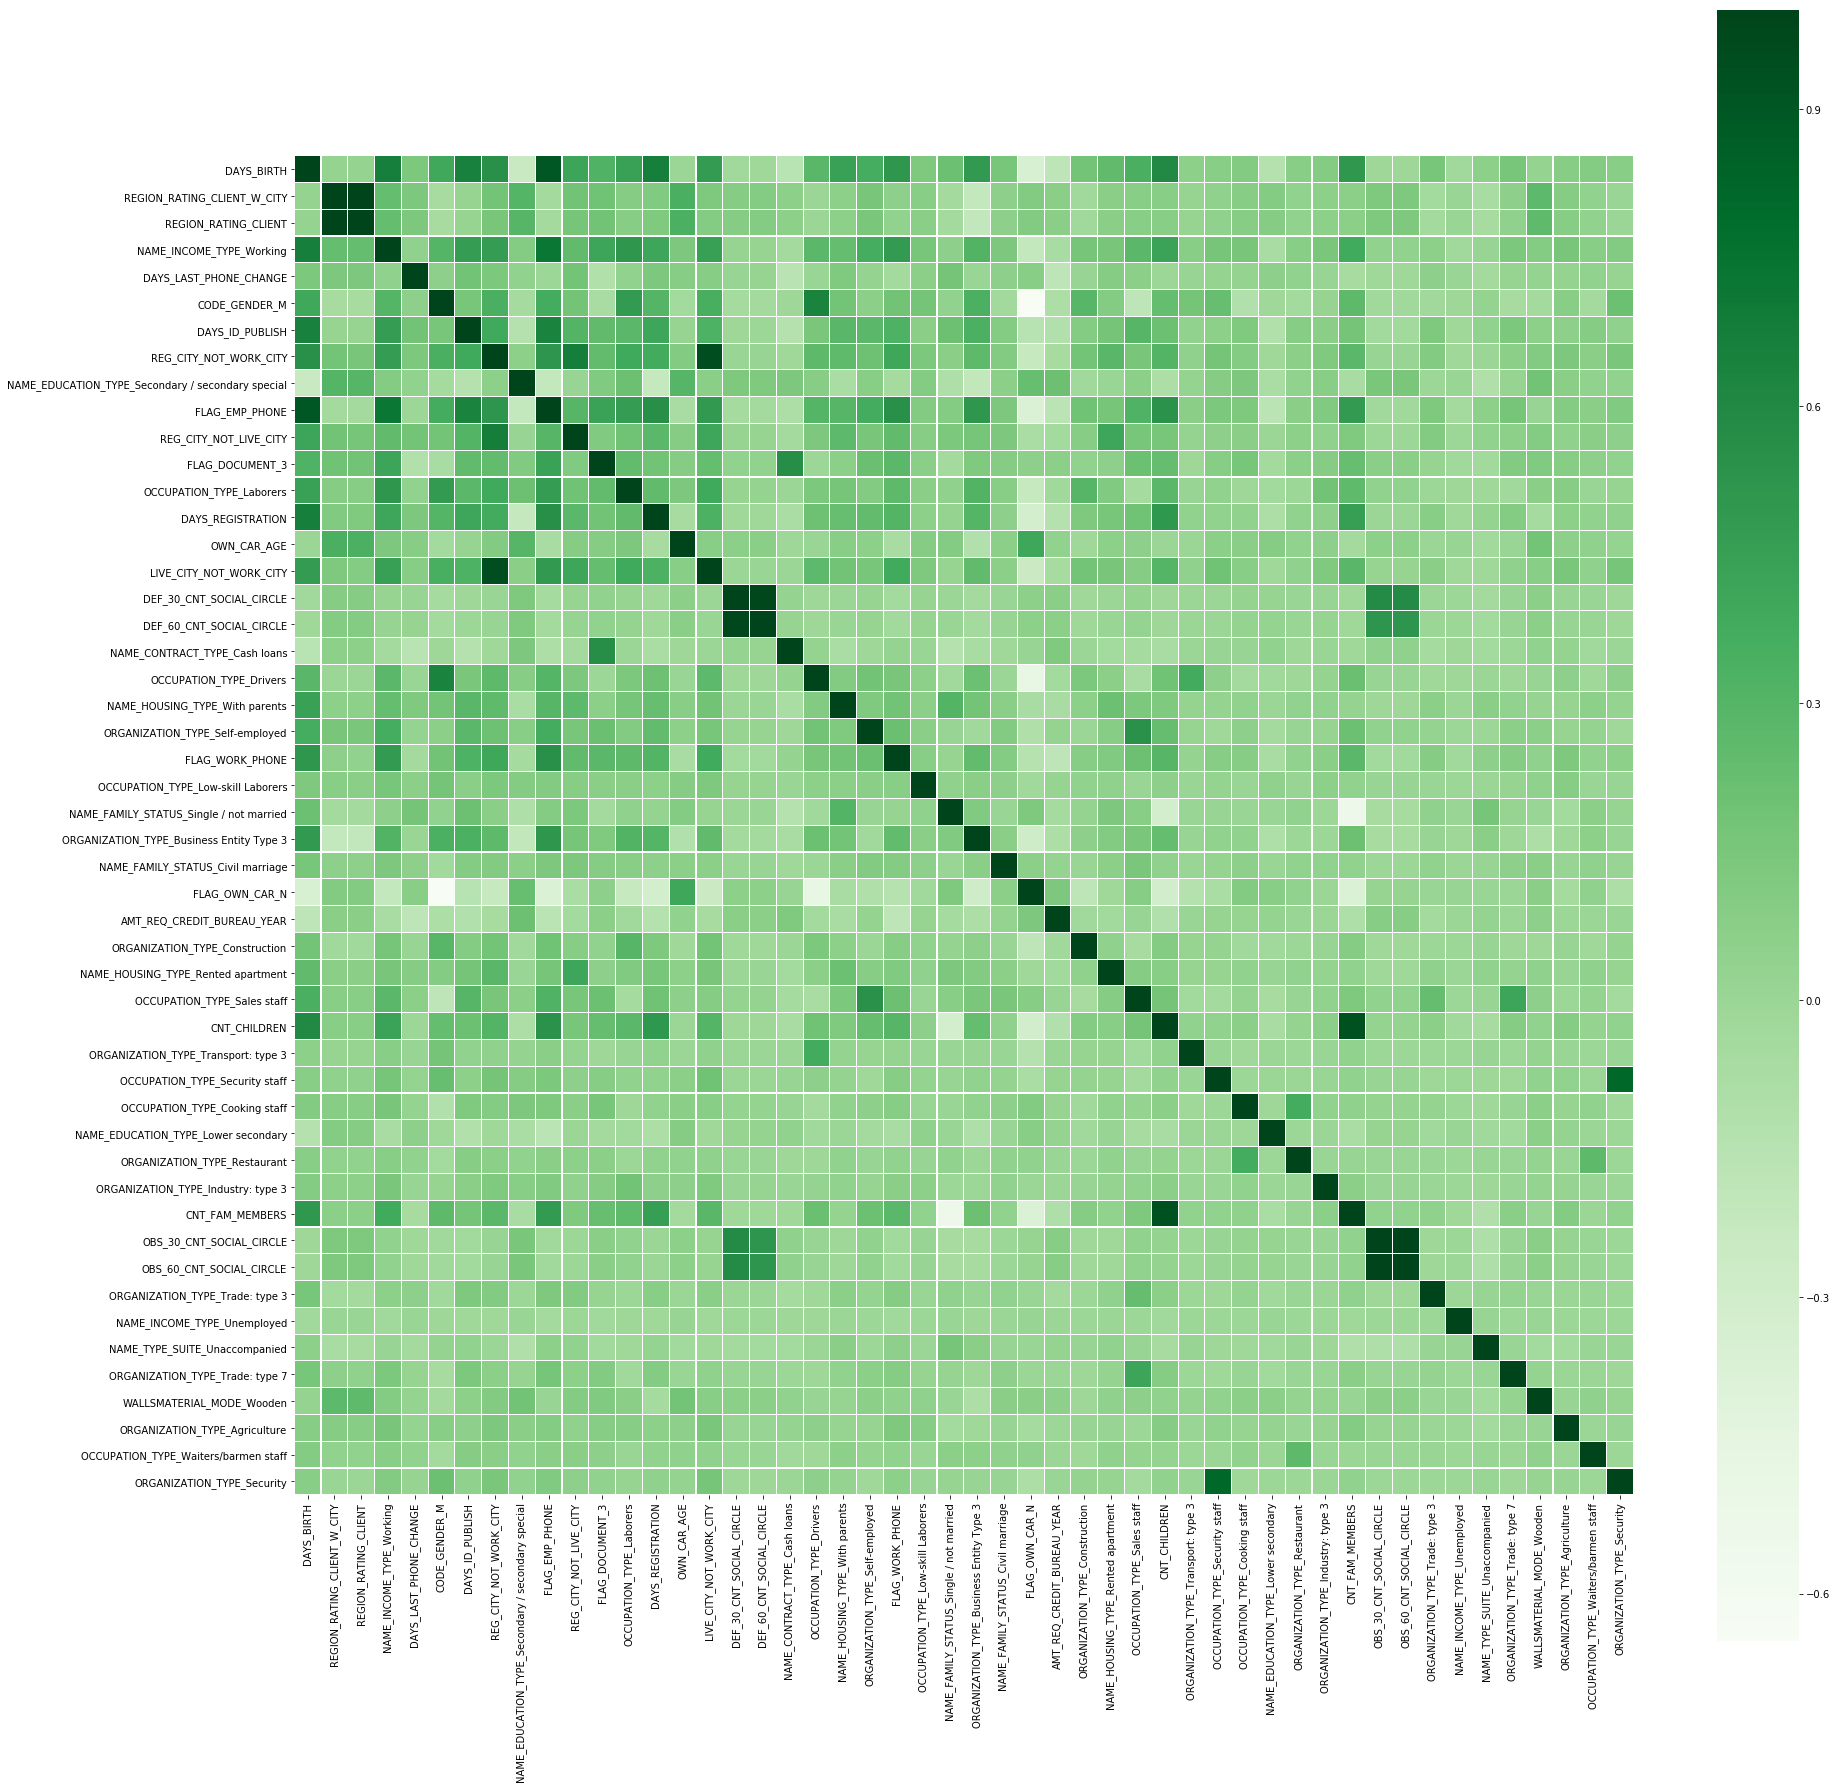

In [21]:
# create the heatmap of the 50 feature values

plt.figure(figsize=(30,30))
sns.heatmap(top50_corr_mat, linewidth=0.1, square=True, cmap="Greens")

plt.show()

    - 目的変数と最も相関関係が高い50個の特徴量のヒートマップを作成した．
    
    - いくつか強い相関を持っている特徴量が見られる。

    - 次に、欠損値の処理は重要なので、欠損値に注目していく。

In [22]:
# check how many percentages each feature values include missing values

total = new_application_train.isnull().sum().drop("SK_ID_CURR").drop("TARGET")
missing_ratio = total / len(new_application_train)

missing_ratio_table = pd.DataFrame({
    'Total': total,
    'missing_ratio': missing_ratio
})

missing_ratio_table

,Total,missing_ratio
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000039
AMT_GOODS_PRICE,278,0.000904
REGION_POPULATION_RELATIVE,0,0.000000
DAYS_BIRTH,0,0.000000
DAYS_EMPLOYED,0,0.000000
DAYS_REGISTRATION,0,0.000000
DAYS_ID_PUBLISH,0,0.000000


    - 欠損値が何%含まれているのかを確認した．

In [23]:
# get 50 feature values whose missing ratio is top 50

top50_missing_ratio = missing_ratio_table.nlargest(51, "missing_ratio")["missing_ratio"]

top50_missing_ratio_table = pd.DataFrame({
    'missing_ratio': top50_missing_ratio
})

top50_missing_ratio_table

,missing_ratio
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
COMMONAREA_MEDI,0.698723
NONLIVINGAPARTMENTS_AVG,0.694330
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_MEDI,0.694330
LIVINGAPARTMENTS_AVG,0.683550
LIVINGAPARTMENTS_MODE,0.683550
LIVINGAPARTMENTS_MEDI,0.683550
FLOORSMIN_AVG,0.678486


    - 欠損値の割合が大きい順から50個を取り出した．
    
    - 人間が算出して作り出した特徴量には、欠損値が多く含まれている。

    - 仮説: 欠損値が多く含まれている特徴量は、データとして信頼性にかけるので、削除する。

In [24]:
# create a list of feature values whose missing ratio is above 48 %

drop_list = list((missing_ratio*100>48)[missing_ratio*100>48].index)

drop_list

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']

    - 欠損値の割合が48%より大きい特徴量のリストを作った．

In [25]:
# drop the feature values whose missing ratio is above 48 % from "new_application_train"
# also, drop a column named "SK_ID_CURR"

application_train_after_dropping = new_application_train.drop(drop_list,axis=1)   \
                                    .drop("SK_ID_CURR",axis=1)

application_train_after_dropping

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0,0,0,0,0,0,0,0,0,0


    - 欠損値の割合が48%より大きい特徴量と，SK_ID_CURRの列を削除した．

    - 仮説: 他の特徴量も欠損値を含んでおり、処理する必要がある。ひとまず、平均値を入れておく。

In [26]:
# change missing values to the mean of each column

final_application_train = application_train_after_dropping.fillna(   \
                                            application_train_after_dropping.mean())

final_application_train

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0,0,0,0,0,0,0,0,0,0


    - 欠損値をそれぞれの特徴量の平均値に変更した．

    - 仮説: 次に重要度を見ていく。重要度が高い特徴量から見ていくのが、効率がよく特徴エンジニアリングができる。

In [27]:
# compute the importance of each feature value by random forest classifier

from sklearn.ensemble import RandomForestClassifier

clf =  RandomForestClassifier()
clf.fit(final_application_train.loc[:, final_application_train.columns != 'TARGET'], 
        final_application_train["TARGET"])

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
importances = clf.feature_importances_

importances

array([1.00431511e-02, 3.41703110e-02, 3.80457073e-02, 4.01043000e-02,
       3.25059537e-02, 3.38068350e-02, 4.31463423e-02, 3.80587566e-02,
       4.35486582e-02, 4.30546870e-02, 0.00000000e+00, 1.36655593e-03,
       5.74895496e-03, 2.92815701e-04, 7.01436945e-03, 3.19926669e-03,
       1.34815889e-02, 6.47505424e-03, 6.78396471e-03, 3.01182311e-02,
       1.32733445e-03, 2.44239156e-03, 2.03752558e-03, 4.12909989e-03,
       5.08441275e-03, 4.90616432e-03, 6.41436977e-02, 5.74500872e-02,
       1.72316130e-02, 6.59503764e-03, 1.66493299e-02, 5.46697604e-03,
       3.92255194e-02, 7.32051888e-05, 5.16731466e-03, 6.81279803e-06,
       1.35625801e-03, 1.87224248e-03, 5.79370689e-05, 2.59586951e-03,
       4.31620212e-04, 0.00000000e+00, 2.71792932e-04, 0.00000000e+00,
       1.24303576e-04, 1.47667873e-04, 1.13091528e-04, 6.76395712e-04,
       3.29830478e-05, 6.52234885e-04, 9.21727146e-05, 1.36445921e-04,
       1.13701560e-04, 3.04199307e-03, 3.03279726e-03, 4.44030269e-03,
      

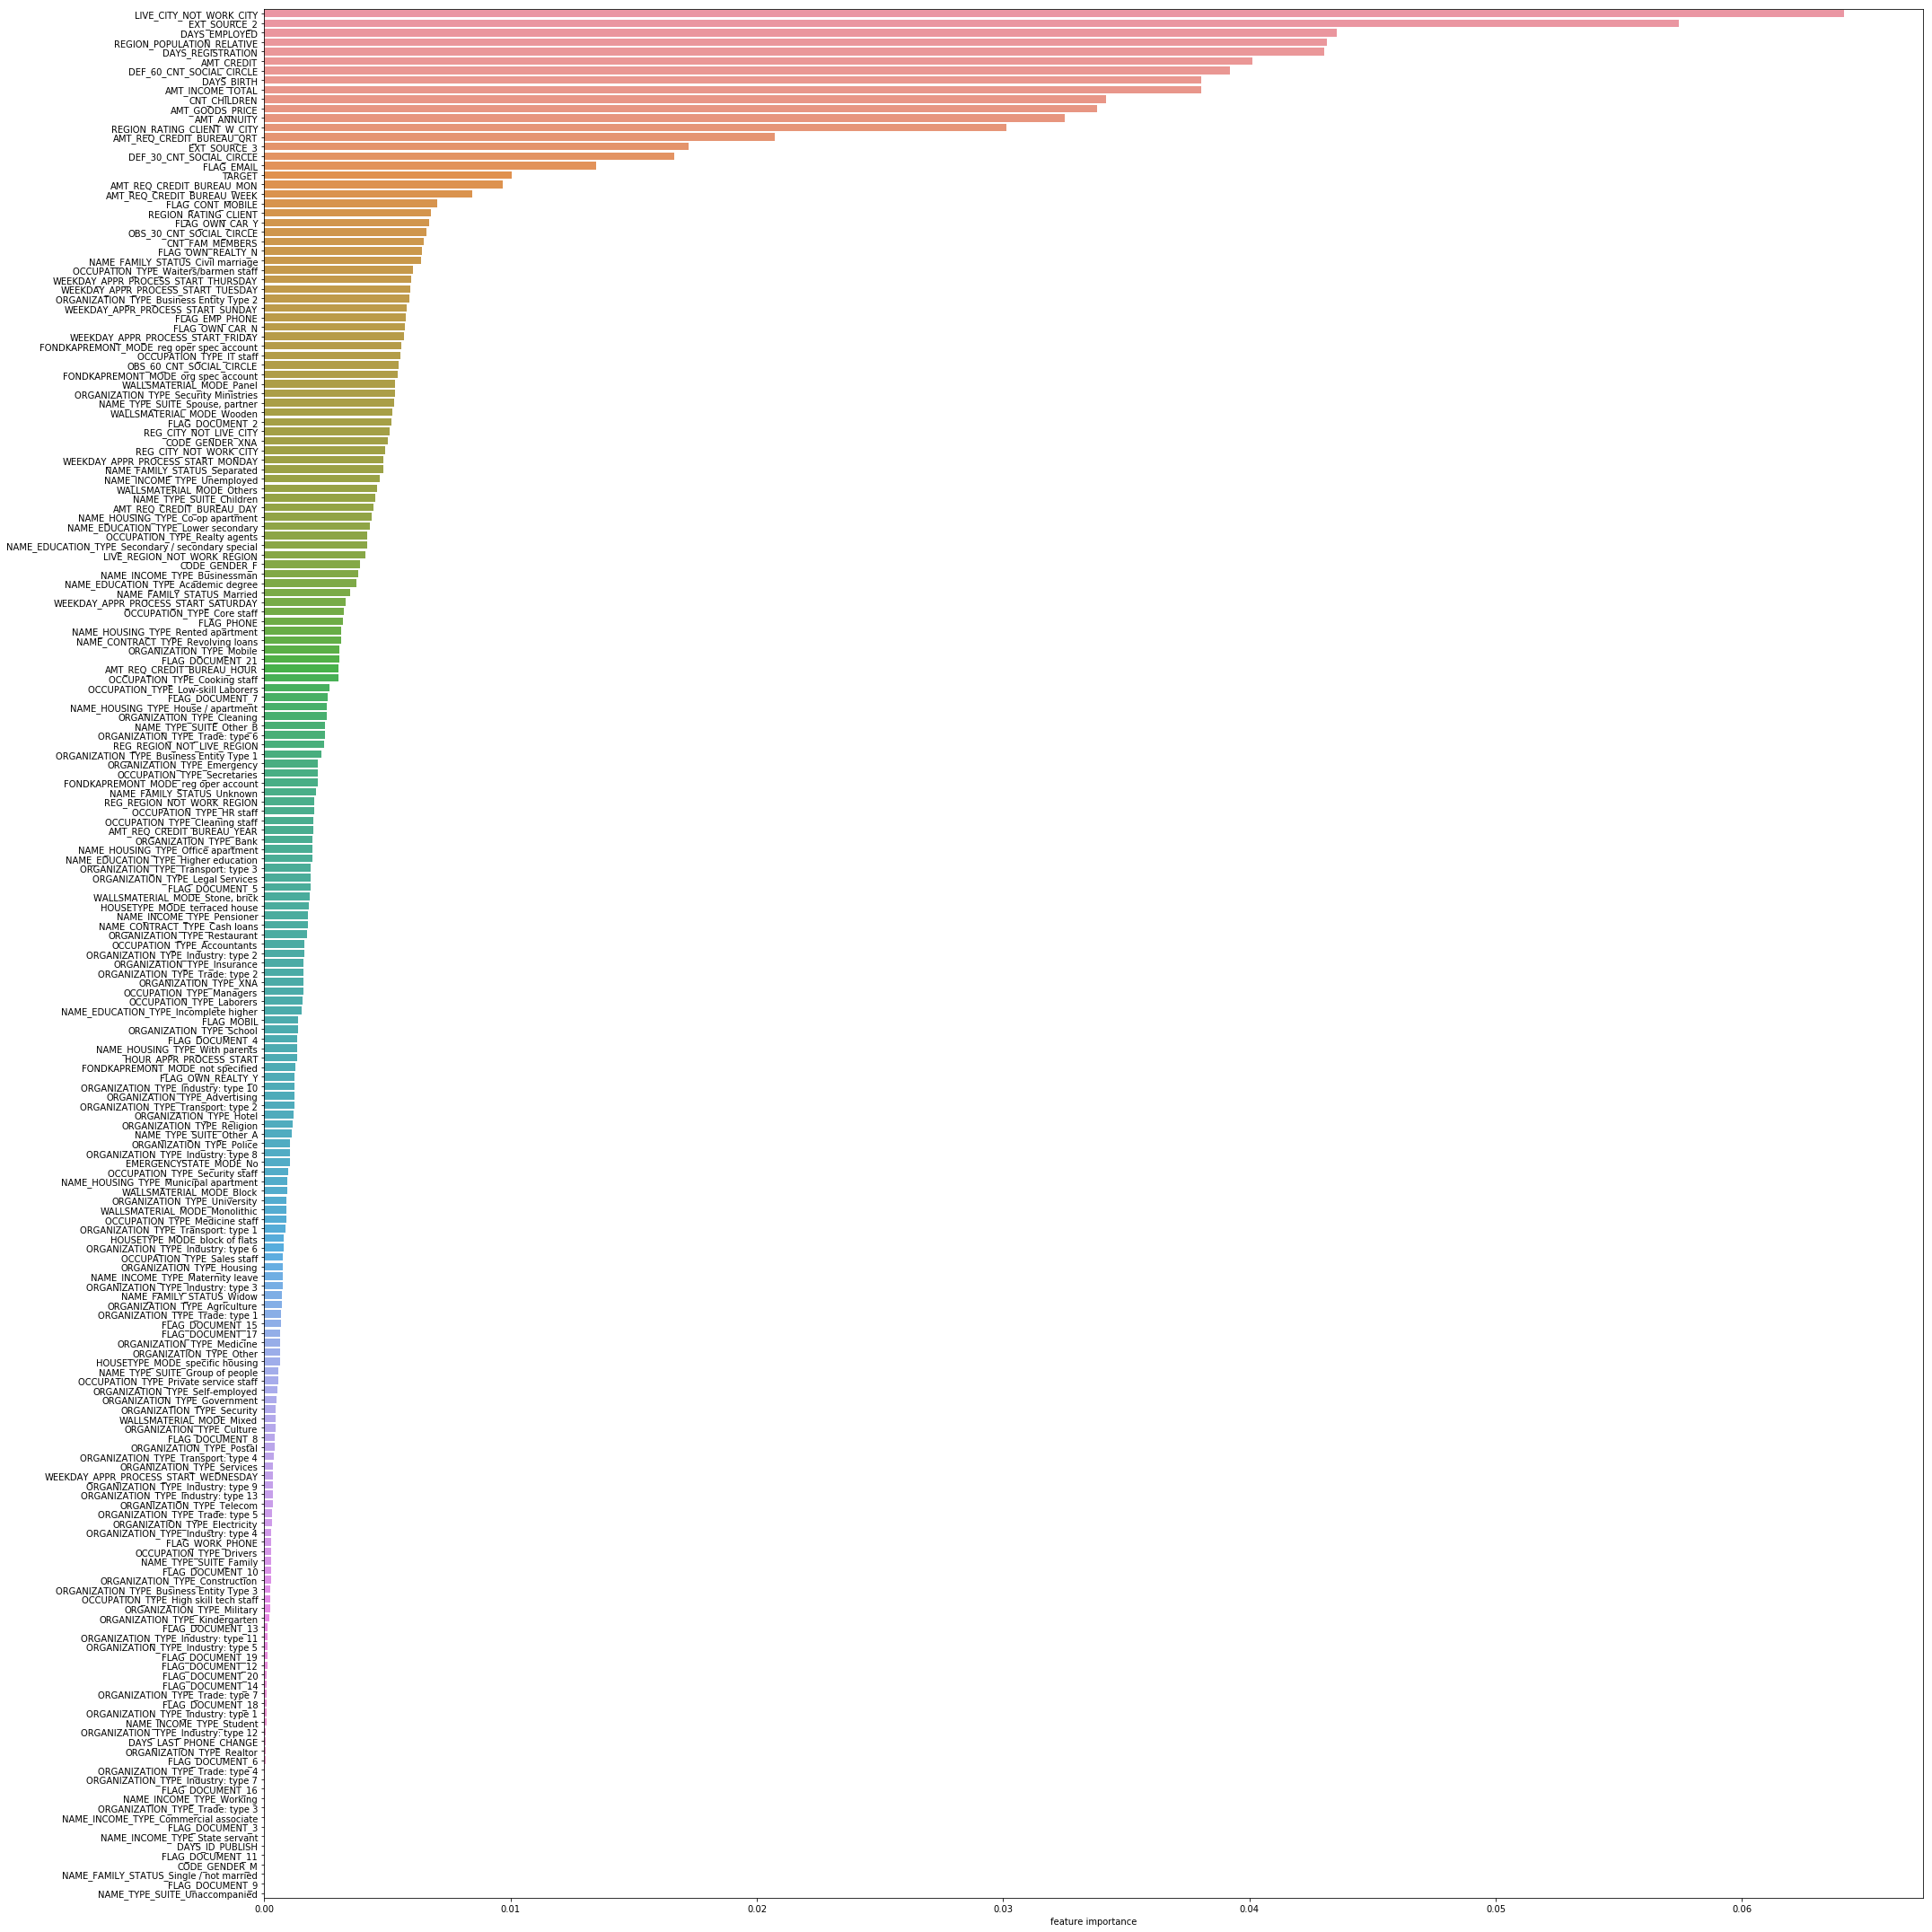

In [29]:
ranking = np.argsort(-importances)
f, ax = plt.subplots(figsize=(30, 30)) 
sns.barplot(x=importances[ranking], y=final_application_train.columns.values[ranking], 
            orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

    - ランダムフォレストで特徴量の重要度を出した．
    
    - 勤務地ではなく、住んでいる地域が、目的関数に大きく影響を与えている。